In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
def getCorrGraph(df, method="kendall"):
    corrDF = df.corr(method=method)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corrDF, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

In [76]:
query = """
#standardsql
WITH users AS (
SELECT DISTINCT(user_id)
FROM `up_ml.email_labels_v1_2019042*`
WHERE unsubscribed = 1)


SELECT userAgg.* EXCEPT(user_id, country_code, dsr_bucket, first_platform, primary_platform , product_type , product_category),
       1 as unsubscribed
FROM `users-protection.hchudgar.user_aggregate_temp_20190419` userAgg
JOIN users
USING(user_id)
"""

In [77]:
unsubDF = pd.read_gbq(query, project_id="users-protection", dialect="standard")

In [86]:
query = """
WITH users AS (
SELECT DISTINCT(user_id)
FROM `up_ml.email_labels_v1_2019042*`
WHERE unsubscribed = 0
  AND rand() < 0.001)


SELECT userAgg.* EXCEPT(user_id, country_code, dsr_bucket, first_platform, primary_platform , product_type , product_category),
       0 as unsubscribed
FROM `users-protection.hchudgar.user_aggregate_temp_20190419` userAgg
JOIN users
USING(user_id)
"""

In [87]:
subDF = pd.read_gbq(query, project_id="users-protection", dialect="standard")

In [88]:
len(subDF)

109102

In [89]:
df = pd.concat([subDF, unsubDF])

In [90]:
df = df.fillna(0)

In [91]:
df.columns

Index([u'dsr', u'has_streamed_ever', u'registered_today',
       u'days_since_last_mau', u'days_since_last_dau', u'is_dau', u'is_mau',
       u'ms_played_day', u'num_streams_day', u'ms_played_month',
       u'num_streams_month', u'num_email_yesterday',
       u'num_email_open_yesterday', u'num_email_click_yesterday',
       u'email_open_rate_yesterday', u'email_click_deliver_rate_yesterday',
       u'email_click_open_rate_yesterday', u'num_push_yesterday',
       u'num_push_click_yesterday', u'push_click_rate_yesterday',
       u'num_in_app_yesterday', u'num_in_app_click_yesterday',
       u'in_app_click_rate_yesterday', u'num_email_week',
       u'num_email_open_week', u'num_email_click_week',
       u'email_open_rate_week', u'email_click_deliver_rate_week',
       u'email_click_open_rate_week', u'num_push_week', u'num_push_click_week',
       u'push_click_rate_week', u'num_in_app_week', u'num_in_app_click_week',
       u'in_app_click_rate_week', u'num_email_month', u'num_email_open_m

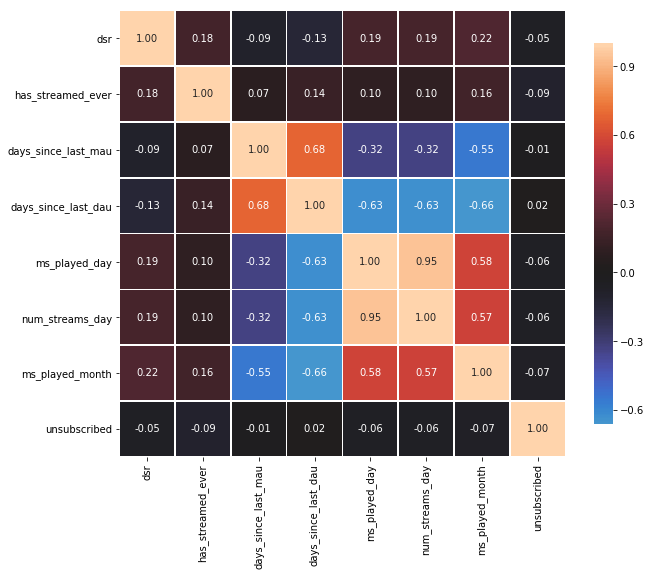

In [106]:
sampleDF = df[["dsr", "has_streamed_ever", "days_since_last_mau", 
               "days_since_last_dau", "ms_played_day", "num_streams_day", "ms_played_month",
               "unsubscribed"]]
getCorrGraph(sampleDF)

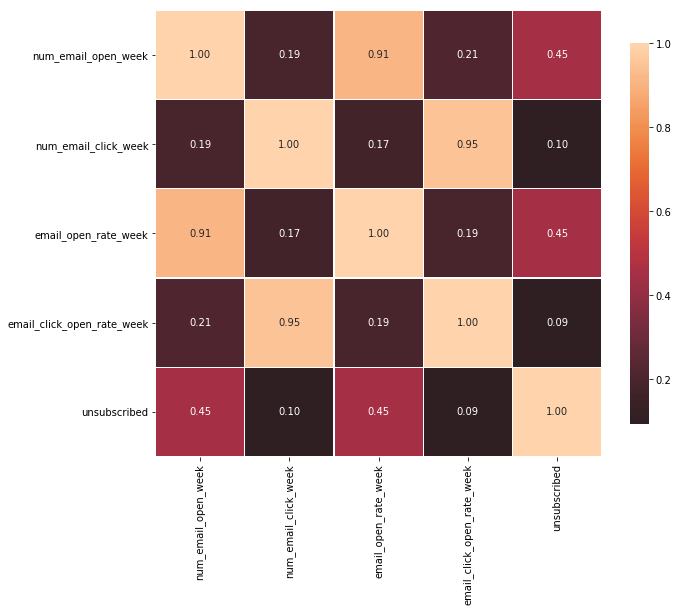

In [107]:
sampleDF = df[["num_email_open_week", "num_email_click_week", 
               "email_open_rate_week", "email_click_open_rate_week", "unsubscribed"]]
getCorrGraph(sampleDF)

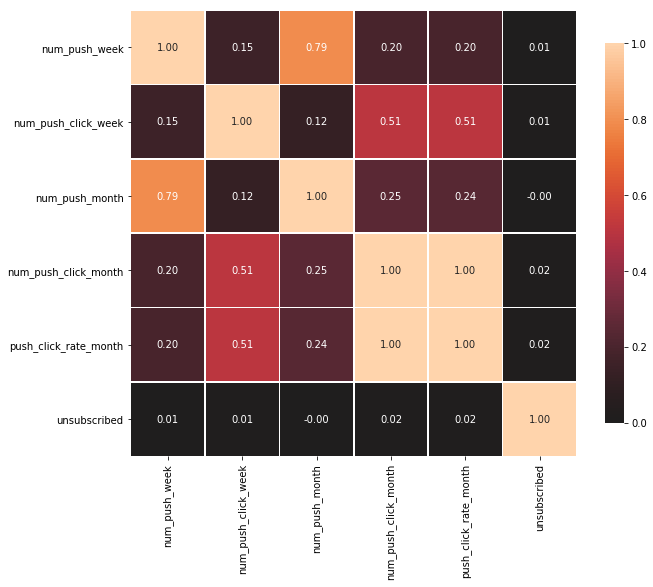

In [108]:
sampleDF = df[["num_push_week", "num_push_click_week", "num_push_month", 
               "num_push_click_month", "push_click_rate_month", "unsubscribed"]]
getCorrGraph(sampleDF)

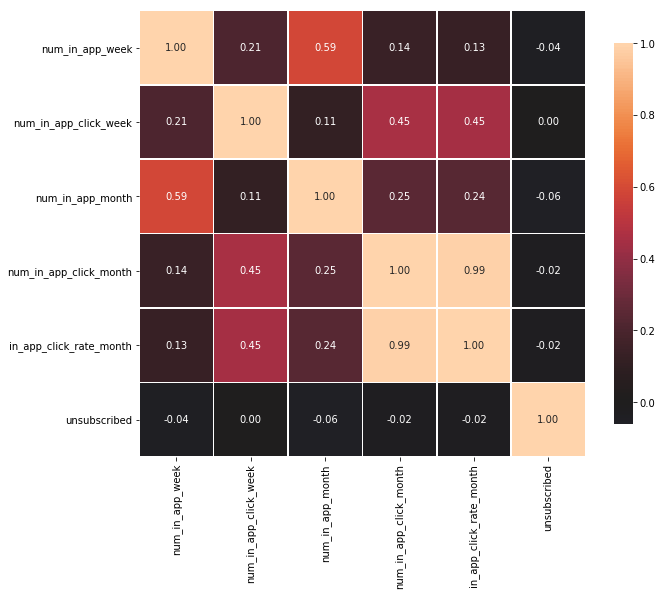

In [109]:
sampleDF = df[["num_in_app_week", "num_in_app_click_week", "num_in_app_month", 
               "num_in_app_click_month", "in_app_click_rate_month", "unsubscribed"]]
getCorrGraph(sampleDF)